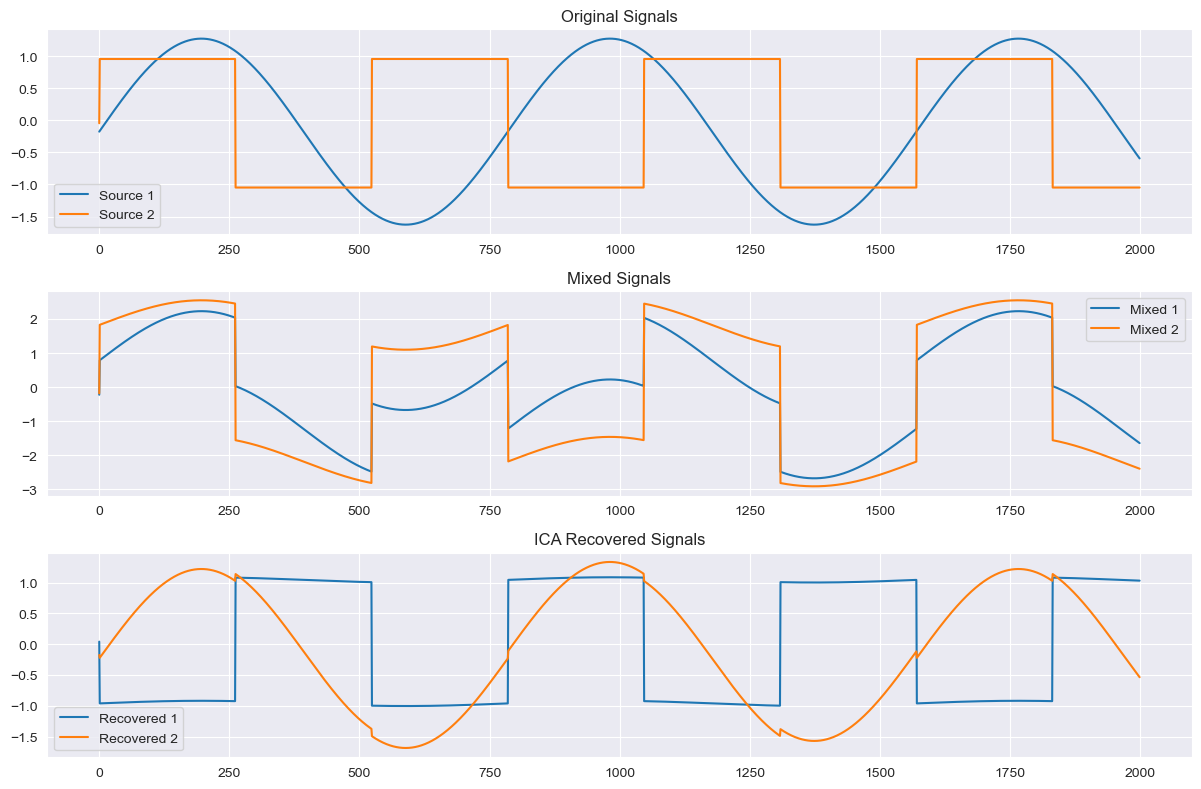

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# 1. Generate two simple sound signals (sine and square waves)

# Parameters
n_samples = 2000  # Number of samples
time = np.linspace(0, 8, n_samples)  # Time vector

# Source 1: Sine wave
s1 = np.sin(2 * time)

# Source 2: Square wave
s2 = np.sign(np.sin(3 * time))

# Stack the original signals
S = np.c_[s1, s2]

# Standardize the data
S -= S.mean(axis=0)
S /= S.std(axis=0)

# 2. Mix the signals with a random mixing matrix
A = np.array([[1, 1], [0.5, 2]])  # Mixing matrix
X = np.dot(S, A.T)  # Mixed signals

# Plot the original and mixed signals
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.title("Original Signals")
plt.plot(S)
plt.legend(['Source 1', 'Source 2'])

plt.subplot(3, 1, 2)
plt.title("Mixed Signals")
plt.plot(X)
plt.legend(['Mixed 1', 'Mixed 2'])

# 3. Apply ICA to the mixed signals
ica = FastICA(n_components=2)
S_estimated = ica.fit_transform(X)  # Reconstructed signals

# 4. Plot the separated (ICA) signals
plt.subplot(3, 1, 3)
plt.title("ICA Recovered Signals")
plt.plot(S_estimated)
plt.legend(['Recovered 1', 'Recovered 2'])

plt.tight_layout()
plt.show()


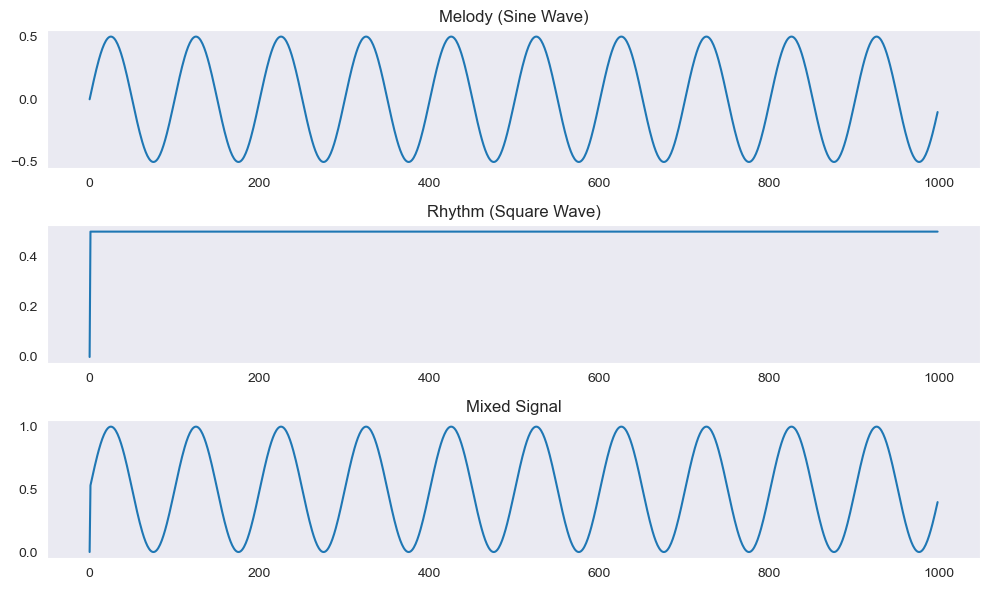

WAV file 'song_and_melody.wav' created!


In [3]:
import numpy as np
from scipy.io.wavfile import write
import matplotlib.pyplot as plt

# Function to generate a sine wave for the melody
def generate_sine_wave(frequency, duration, sample_rate=44100):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    return 0.5 * np.sin(2 * np.pi * frequency * t)

# Function to generate a square wave for the rhythm
def generate_square_wave(frequency, duration, sample_rate=44100):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    return 0.5 * np.sign(np.sin(2 * np.pi * frequency * t))

# Define parameters for the song and melody
duration = 5  # in seconds
sample_rate = 44100  # CD quality sample rate

# Melody: simple sine wave pattern (notes in Hz)
melody_frequencies = [440, 494, 523, 587, 659, 698, 784, 880]  # A4, B4, C5, etc.
melody = np.concatenate([generate_sine_wave(freq, 0.5, sample_rate) for freq in melody_frequencies])

# Rhythm: simple square wave
rhythm = generate_square_wave(2, duration, sample_rate)  # 2 Hz square wave for rhythm

# Trim the rhythm to the length of the melody
if len(rhythm) > len(melody):
    rhythm = rhythm[:len(melody)]  # Trim rhythm to match melody length

# Mix the melody and rhythm
mixed_signal = melody + rhythm

# Normalize the signal to be in the range [-1, 1]
mixed_signal /= np.max(np.abs(mixed_signal))

# Save the mixed sound to a .wav file
write("song_and_melody.wav", sample_rate, mixed_signal.astype(np.float32))

# Plot the generated signals
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.title("Melody (Sine Wave)")
plt.plot(melody[:1000])  # Plot first 1000 samples
plt.grid()

plt.subplot(3, 1, 2)
plt.title("Rhythm (Square Wave)")
plt.plot(rhythm[:1000])  # Plot first 1000 samples
plt.grid()

plt.subplot(3, 1, 3)
plt.title("Mixed Signal")
plt.plot(mixed_signal[:1000])  # Plot first 1000 samples
plt.grid()

plt.tight_layout()
plt.show()

print("WAV file 'song_and_melody.wav' created!")


In [6]:
mixed_signals = np.array([mixed_signal, mixed_signal])

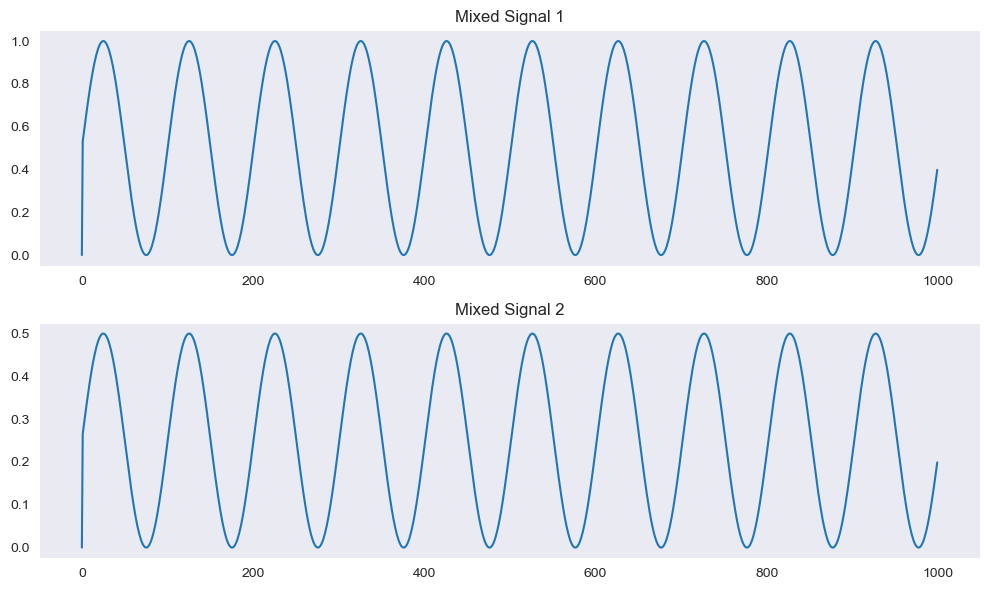

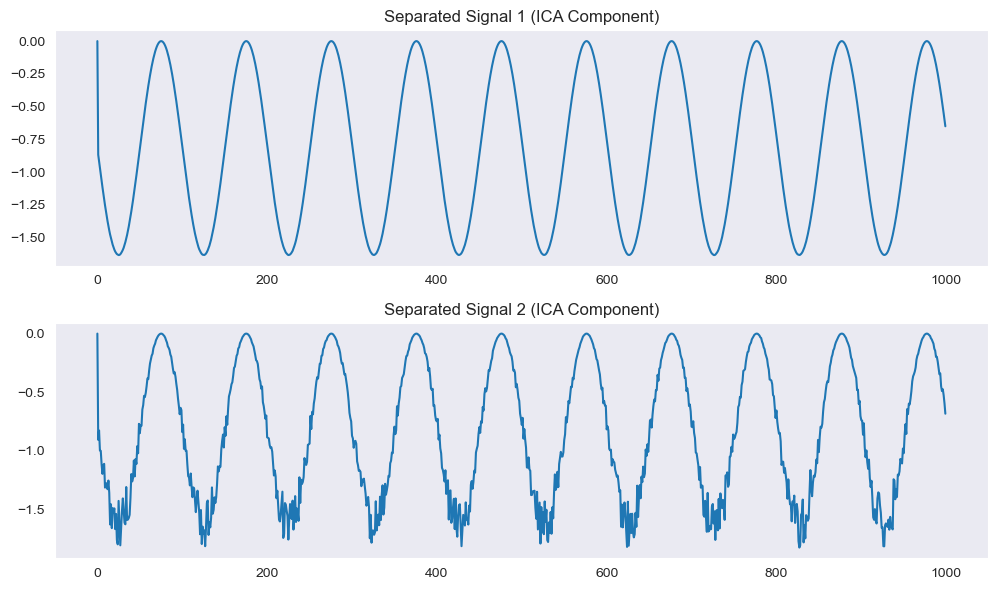

WAV files 'separated_signal_1.wav' and 'separated_signal_2.wav' created!


In [10]:
import numpy as np
from scipy.io.wavfile import write, read
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Function to generate a second mixed signal for ICA
def generate_mixed_signals(melody, rhythm):
    # Create a second set of mixed signals with a different mixing matrix
    mixed_signal_1 = melody + rhythm
    mixed_signal_2 = (melody + rhythm) * 0.5  # Another linear combination
    return np.c_[mixed_signal_1, mixed_signal_2]

# Load the mixed signal (using the earlier generated signals)
duration = 5  # in seconds
sample_rate = 44100  # CD quality sample rate

# Melody and rhythm generated from the previous code
melody_frequencies = [440, 494, 523, 587, 659, 698, 784, 880]  # A4, B4, C5, etc.
melody = np.concatenate([generate_sine_wave(freq, 0.5, sample_rate) for freq in melody_frequencies])
rhythm = generate_square_wave(2, duration, sample_rate)  # 2 Hz square wave for rhythm

# Trim the rhythm to the length of the melody
if len(rhythm) > len(melody):
    rhythm = rhythm[:len(melody)]  # Trim rhythm to match melody length

# Generate two mixed signals for ICA
mixed_signals = generate_mixed_signals(melody, rhythm)

# Plot the mixed signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.title("Mixed Signal 1")
plt.plot(mixed_signals[:, 0][:1000])  # Plot first 1000 samples
plt.grid()

plt.subplot(2, 1, 2)
plt.title("Mixed Signal 2")
plt.plot(mixed_signals[:, 1][:1000])  # Plot first 1000 samples
plt.grid()

plt.tight_layout()
plt.show()

# 2. Apply ICA to separate the signals
ica = FastICA(n_components=2)
separated_signals = ica.fit_transform(mixed_signals)  # ICA decomposition

# Plot the separated signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.title("Separated Signal 1 (ICA Component)")
plt.plot(separated_signals[:, 0][:1000])  # Plot first 1000 samples
plt.grid()

plt.subplot(2, 1, 2)
plt.title("Separated Signal 2 (ICA Component)")
plt.plot(separated_signals[:, 1][:1000])  # Plot first 1000 samples
plt.grid()

plt.tight_layout()
plt.show()

# Normalize and save the separated signals as WAV files
separated_signal_1 = separated_signals[:, 0] / np.max(np.abs(separated_signals[:, 0]))
separated_signal_2 = separated_signals[:, 1] / np.max(np.abs(separated_signals[:, 1]))

write("separated_signal_1.wav", sample_rate, separated_signal_1.astype(np.float32))
write("separated_signal_2.wav", sample_rate, separated_signal_2.astype(np.float32))

print("WAV files 'separated_signal_1.wav' and 'separated_signal_2.wav' created!")


In [11]:
import numpy as np
from scipy.io.wavfile import write, read
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Function to normalize audio signals to the range [-1, 1]
def normalize_signal(signal):
    return signal / np.max(np.abs(signal))

# Load two audio files (person1 and person2 speaking)
sample_rate1, person1 = read('person1.wav')
sample_rate2, person2 = read('person2.wav')

# Ensure both files have the same sample rate
assert sample_rate1 == sample_rate2, "Sample rates of both files must match!"
sample_rate = sample_rate1

# Ensure both audio signals have the same length by trimming the longer one
min_length = min(len(person1), len(person2))
person1 = person1[:min_length]
person2 = person2[:min_length]

# Normalize both audio signals
person1 = normalize_signal(person1.astype(np.float32))
person2 = normalize_signal(person2.astype(np.float32))

# Mix the two audio signals using a mixing matrix
# Mixed signal 1: linear combination of both signals
mixed_signal_1 = person1 + person2
# Mixed signal 2: another linear combination
mixed_signal_2 = 0.6 * person1 + 1.4 * person2

# Stack the mixed signals for ICA input (2 channels: mixed_signal_1 and mixed_signal_2)
mixed_signals = np.c_[mixed_signal_1, mixed_signal_2]

# Plot the mixed signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.title("Mixed Signal 1")
plt.plot(mixed_signals[:, 0][:1000])  # Plot first 1000 samples
plt.grid()

plt.subplot(2, 1, 2)
plt.title("Mixed Signal 2")
plt.plot(mixed_signals[:, 1][:1000])  # Plot first 1000 samples
plt.grid()

plt.tight_layout()
plt.show()

# 2. Apply ICA to separate the signals
ica = FastICA(n_components=2)
separated_signals = ica.fit_transform(mixed_signals)  # ICA decomposition

# Plot the separated signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.title("Separated Signal 1 (ICA Component)")
plt.plot(separated_signals[:, 0][:1000])  # Plot first 1000 samples
plt.grid()

plt.subplot(2, 1, 2)
plt.title("Separated Signal 2 (ICA Component)")
plt.plot(separated_signals[:, 1][:1000])  # Plot first 1000 samples
plt.grid()

plt.tight_layout()
plt.show()

# Normalize and save the separated signals as WAV files
separated_signal_1 = separated_signals[:, 0] / np.max(np.abs(separated_signals[:, 0]))
separated_signal_2 = separated_signals[:, 1] / np.max(np.abs(separated_signals[:, 1]))

write("separated_person1.wav", sample_rate, separated_signal_1.astype(np.float32))
write("separated_person2.wav", sample_rate, separated_signal_2.astype(np.float32))

print("WAV files 'separated_person1.wav' and 'separated_person2.wav' created!")


FileNotFoundError: [Errno 2] No such file or directory: 'person1.wav'

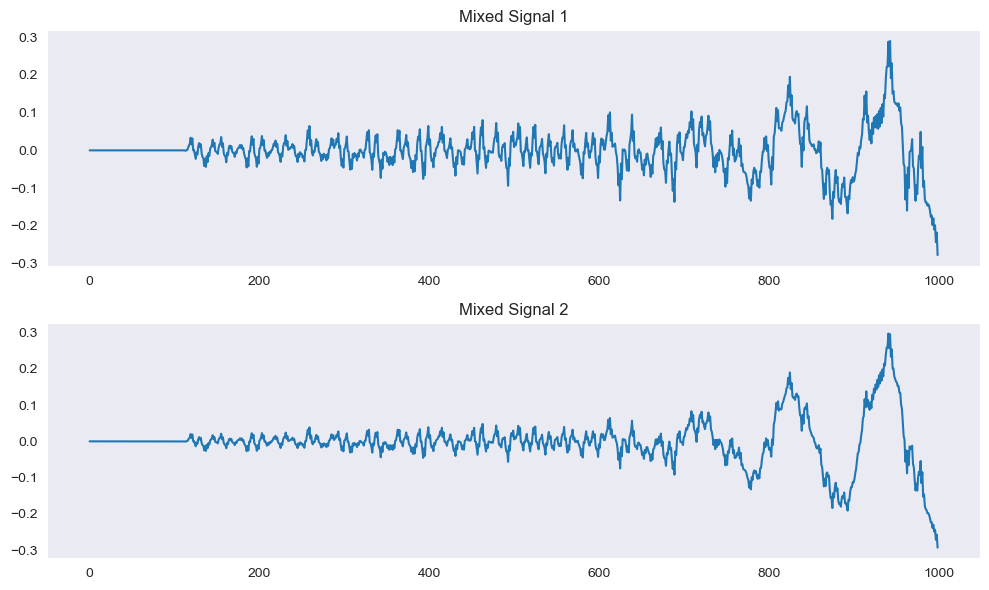

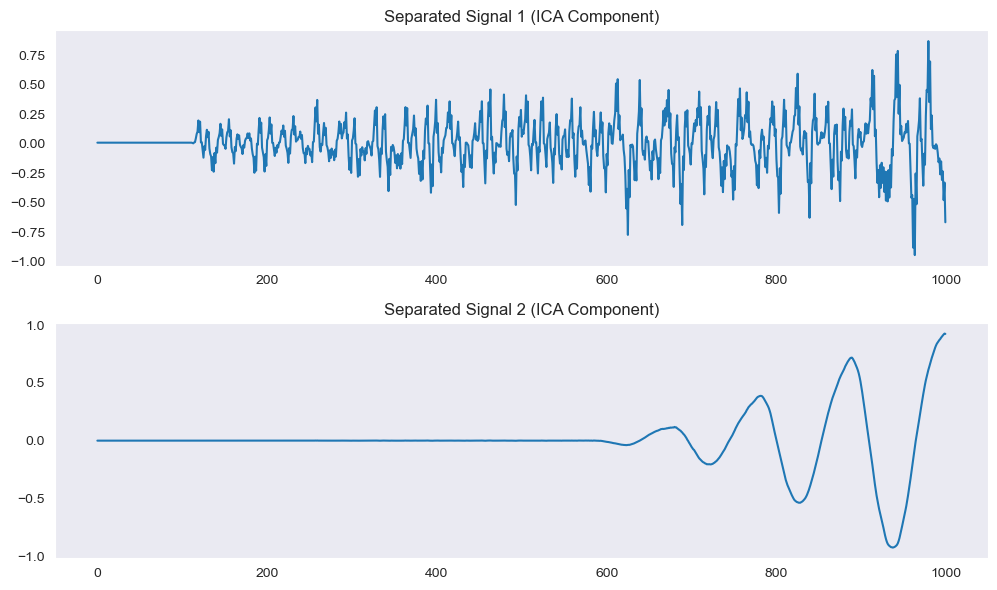

WAV files 'separated_person1.wav' and 'separated_person2.wav' created!


In [14]:
import numpy as np
import pyttsx3
from scipy.io.wavfile import write, read
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
import os
from pydub import AudioSegment

# Initialize the text-to-speech engine
engine = pyttsx3.init()

# Function to generate and save speech to a WAV file
def generate_speech(text, filename, rate=150, voice_id=0):
    engine.setProperty('rate', rate)  # Speed of speech
    voices = engine.getProperty('voices')
    engine.setProperty('voice', voices[voice_id].id)  # Set voice by index
    engine.save_to_file(text, filename)
    engine.runAndWait()

# Function to convert the WAV file to a compatible format using pydub
def convert_to_wav(input_file, output_file):
    sound = AudioSegment.from_file(input_file)
    sound.export(output_file, format="wav")

# Generate two different speeches
text1 = "Hello, how are you today? I hope you are doing well."
text2 = "The weather is nice and sunny. Let's go for a walk in the park."

# Save speeches to WAV files (these might not be in the correct RIFF format)
generate_speech(text1, 'person1_temp.wav', voice_id=0)  # First speaker
generate_speech(text2, 'person2_temp.wav', voice_id=1)  # Second speaker

# Wait for the WAV files to be created (ensures pyttsx3 finishes saving files)
engine.stop()

# Convert the generated files to proper RIFF WAV format
convert_to_wav('person1_temp.wav', 'person1.wav')
convert_to_wav('person2_temp.wav', 'person2.wav')

# Function to normalize audio signals to the range [-1, 1]
def normalize_signal(signal):
    return signal / np.max(np.abs(signal))

# Load the converted speech audio files
sample_rate1, person1 = read('person1.wav')
sample_rate2, person2 = read('person2.wav')

# Ensure both files have the same sample rate
assert sample_rate1 == sample_rate2, "Sample rates of both files must match!"
sample_rate = sample_rate1

# Ensure both audio signals have the same length by trimming the longer one
min_length = min(len(person1), len(person2))
person1 = person1[:min_length]
person2 = person2[:min_length]

# Normalize both audio signals
person1 = normalize_signal(person1.astype(np.float32))
person2 = normalize_signal(person2.astype(np.float32))

# Mix the two audio signals using a mixing matrix
# Mixed signal 1: linear combination of both signals
mixed_signal_1 = person1 + person2
# Mixed signal 2: another linear combination
mixed_signal_2 = 0.6 * person1 + 1.4 * person2

# Stack the mixed signals for ICA input (2 channels: mixed_signal_1 and mixed_signal_2)
mixed_signals = np.c_[mixed_signal_1, mixed_signal_2]

# Plot the mixed signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.title("Mixed Signal 1")
plt.plot(mixed_signals[:, 0][:1000])  # Plot first 1000 samples
plt.grid()

plt.subplot(2, 1, 2)
plt.title("Mixed Signal 2")
plt.plot(mixed_signals[:, 1][:1000])  # Plot first 1000 samples
plt.grid()

plt.tight_layout()
plt.show()

# 2. Apply ICA to separate the signals
ica = FastICA(n_components=2)
separated_signals = ica.fit_transform(mixed_signals)  # ICA decomposition

# Plot the separated signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.title("Separated Signal 1 (ICA Component)")
plt.plot(separated_signals[:, 0][:1000])  # Plot first 1000 samples
plt.grid()

plt.subplot(2, 1, 2)
plt.title("Separated Signal 2 (ICA Component)")
plt.plot(separated_signals[:, 1][:1000])  # Plot first 1000 samples
plt.grid()

plt.tight_layout()
plt.show()

# Normalize and save the separated signals as WAV files
separated_signal_1 = separated_signals[:, 0] / np.max(np.abs(separated_signals[:, 0]))
separated_signal_2 = separated_signals[:, 1] / np.max(np.abs(separated_signals[:, 1]))

write("separated_person1.wav", sample_rate, separated_signal_1.astype(np.float32))
write("separated_person2.wav", sample_rate, separated_signal_2.astype(np.float32))

print("WAV files 'separated_person1.wav' and 'separated_person2.wav' created!")



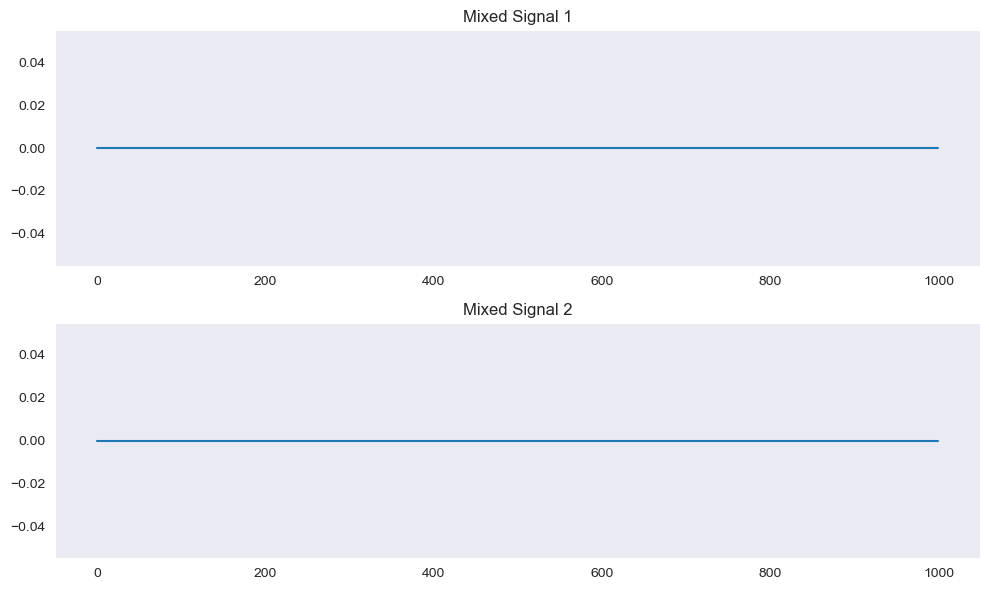

/Users/jamesguan/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


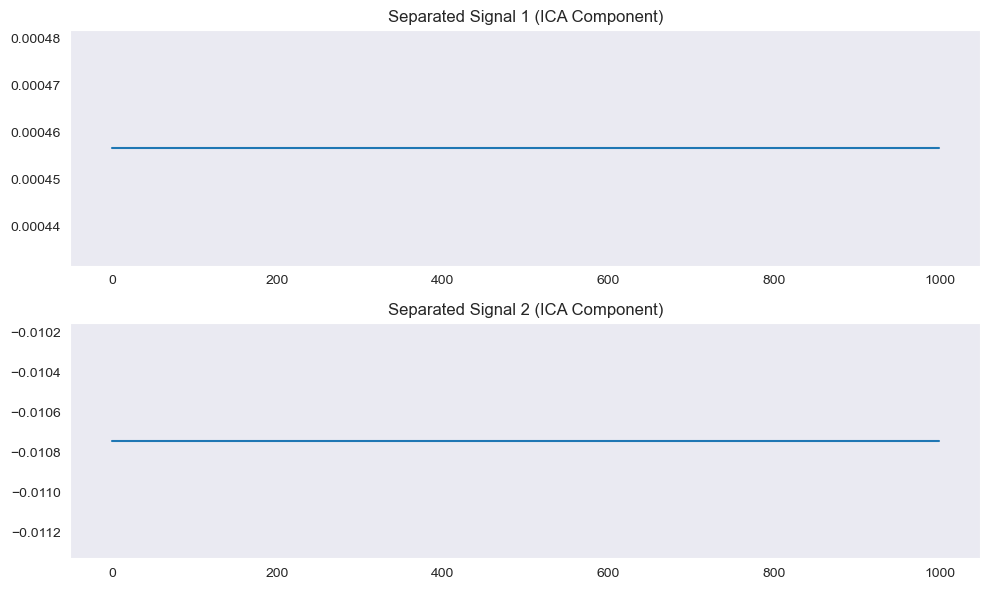

WAV files 'separated_person1.wav' and 'separated_person2.wav' created!


In [20]:
import numpy as np
from gtts import gTTS
from scipy.io.wavfile import write, read
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
import os
from pydub import AudioSegment

# Function to generate and save speech using gTTS
def generate_speech_gtts(text, filename, lang='en'):
    tts = gTTS(text=text, lang=lang)
    tts.save(filename)

# Function to convert mp3 to wav using pydub (gTTS generates mp3 by default)
def convert_mp3_to_wav(mp3_file, wav_file):
    sound = AudioSegment.from_mp3(mp3_file)
    sound.export(wav_file, format="wav")

# Generate two different speeches with gTTS
text1 = "Hello, how are you today? I hope you are doing well."
text2 = "The weather is nice and sunny. Let's go for a walk in the park."

# Save the speeches as mp3 files (gTTS default)
generate_speech_gtts(text1, 'person1.mp3')
generate_speech_gtts(text2, 'person2.mp3')

# Convert the mp3 files to wav files
convert_mp3_to_wav('person1.mp3', 'person1.wav')
convert_mp3_to_wav('person2.mp3', 'person2.wav')

# Function to normalize audio signals to the range [-1, 1]
def normalize_signal(signal):
    return signal / np.max(np.abs(signal))

# Load the converted speech audio files
sample_rate1, person1 = read('person1.wav')
sample_rate2, person2 = read('person2.wav')

# Ensure both files have the same sample rate
assert sample_rate1 == sample_rate2, "Sample rates of both files must match!"
sample_rate = sample_rate1

# Ensure both audio signals have the same length by trimming the longer one
min_length = min(len(person1), len(person2))
person1 = person1[:min_length]
person2 = person2[:min_length]

# Normalize both audio signals
person1 = normalize_signal(person1.astype(np.float32))
person2 = normalize_signal(person2.astype(np.float32))

# Mix the two audio signals using a mixing matrix
# Mixed signal 1: linear combination of both signals
mixed_signal_1 = person1 + person2
# Mixed signal 2: another linear combination
mixed_signal_2 = 0.4 * (person1 + person2)

# Stack the mixed signals for ICA input (2 channels: mixed_signal_1 and mixed_signal_2)
mixed_signals = np.c_[mixed_signal_1, mixed_signal_2]

# Save the mixed signals as WAV files
write("mixed_signal_1.wav", sample_rate, mixed_signal_1.astype(np.float32))
write("mixed_signal_2.wav", sample_rate, mixed_signal_2.astype(np.float32))

# Plot the mixed signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.title("Mixed Signal 1")
plt.plot(mixed_signals[:, 0][:1000])  # Plot first 1000 samples
plt.grid()

plt.subplot(2, 1, 2)
plt.title("Mixed Signal 2")
plt.plot(mixed_signals[:, 1][:1000])  # Plot first 1000 samples
plt.grid()

plt.tight_layout()
plt.show()

# 2. Apply ICA to separate the signals
ica = FastICA(n_components=2, max_iter=2000)
separated_signals = ica.fit_transform(mixed_signals)  # ICA decomposition

# Plot the separated signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.title("Separated Signal 1 (ICA Component)")
plt.plot(separated_signals[:, 0][:1000])  # Plot first 1000 samples
plt.grid()

plt.subplot(2, 1, 2)
plt.title("Separated Signal 2 (ICA Component)")
plt.plot(separated_signals[:, 1][:1000])  # Plot first 1000 samples
plt.grid()

plt.tight_layout()
plt.show()

# Normalize and save the"separated signals as WAV files
separated_signal_1 = separated_signals[:, 0] / np.max(np.abs(separated_signals[:, 0]))
separated_signal_2 = separated_signals[:, 1] / np.max(np.abs(separated_signals[:, 1]))

write("separated_person1.wav", sample_rate, separated_signal_1.astype(np.float32))
write("separated_person2.wav", sample_rate, separated_signal_2.astype(np.float32))

print("WAV files 'separated_person1.wav' and 'separated_person2.wav' created!")